In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
prodcut_data = pd.read_csv("data_add_nik.csv")
df = prodcut_data.copy()

In [4]:
df.head(25)

Product Name Product ID  \
0   Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1                Women's adidas Originals Sleek Shoes     G27341   
2                   Women's adidas Swim Puka Slippers     CM0081   
3    Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4            Women's adidas Originals Taekwondo Shoes     D98205   
5   Women's adidas Sport Inspired Duramo Lite 2.0 ...     B75586   
6   Women's adidas Sport Inspired Duramo Lite 2.0 ...     CG4051   
7                   Women's adidas Swim Puka Slippers     CM0080   
8               WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES     B75990   
9           Men's adidas Originals Forest Grove Shoes     EE5761   
10           Women's adidas Originals Swift Run Shoes     EE4553   
11    Women's adidas Originals Continental Vulc Shoes     EF9315   
12              Women's adidas Running Duramo 9 Shoes     F35281   
13          Women's adidas Originals Supercourt Shoes     EF9220   
14   Men's adidas Sport Inspired Response Trail Shoes     EG0000   
15              Women's adidas Running Cosmic 2 Shoes     B44889   
16   Women's adidas Sport Inspired Storm Runner Shoes     CL7417   
17     Women's adidas Sport Inspired Quickspike Shoes     CL7408   
18           WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS     B43601   
19     Women's adidas Sport Inspired Lite Racer Shoes     EE8245   
20              Women's adidas Running Duramo 9 Shoes     EE8042   
21       Women's adidas Sport Inspired Arcadeis Shoes     CL7429   
22         Women's adidas Sport Inspired Videll Shoes     CL7370   
23        Women's adidas Running EnergyFalcon X Shoes     EE9946   
24         Women's adidas Sport Inspired Videll Shoes     CK9741   

    Listing Price  Sale Price  Discount                    Brand  Rating  \
0           14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1            7599        3799        50         Adidas ORIGINALS     3.3   
2             999         599        40        Adidas CORE / NEO     2.6   
3            6999        3499        50        Adidas CORE / NEO     4.1   
4            7999        3999        50         Adidas ORIGINALS     3.5   
5            4799        1920        60        Adidas CORE / NEO     1.0   
6            4799        2399        50        Adidas CORE / NEO     4.4   
7             999         599        40        Adidas CORE / NEO     2.8   
8            5599        2799        50        Adidas CORE / NEO     4.5   
9            6599        3959        40         Adidas ORIGINALS     4.0   
10           7599        4559        40         Adidas ORIGINALS     2.7   
11           6599        3959        40         Adidas ORIGINALS     4.2   
12           5999        2999        50        Adidas CORE / NEO     2.6   
13           7599        4559        40         Adidas ORIGINALS     3.1   
14           7999        3999        50        Adidas CORE / NEO     3.2   
15           5999        2999        50        Adidas CORE / NEO     3.1   
16           4599        2299        50        Adidas CORE / NEO     1.0   
17           3999        1999        50        Adidas CORE / NEO     3.1   
18           3299        1649        50        Adidas CORE / NEO     2.7   
19           4299        2149        50        Adidas CORE / NEO     3.8   
20           5599        2799        50        Adidas CORE / NEO     5.0   
21           4299        2149        50        Adidas CORE / NEO     3.7   
22           3799        2279        40        Adidas CORE / NEO     3.9   
23           6599        3299        50        Adidas CORE / NEO     4.4   
24           3799        1899        50        Adidas CORE / NEO     3.6   

    Reviews  
0        41  
1        24  
2        37  
3        35  
4        72  
5        45  
6         2  
7         7  
8        16  
9        39  
10       36  
11       35  
12       97  
13       62  
14       16  
15       69  
16       16  
17        8  
18       62  
19       67  
2

In [5]:
df.columns = [c.replace(" ", "_") for c in df.columns]

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [7]:
df.drop("Product_ID", axis=1, inplace=True)

In [8]:
df.duplicated().sum()


117

In [11]:
df.describe()

Listing_Price    Sale_Price     Discount       Rating      Reviews
count    3268.000000   3268.000000  3268.000000  3268.000000  3268.000000
mean     6868.020196   6134.265606    26.875765     3.242105    40.551714
std      4724.659386   4293.247581    22.633487     1.428856    31.543491
min         0.000000    449.000000     0.000000     0.000000     0.000000
25%      4299.000000   2999.000000     0.000000     2.600000    10.000000
50%      5999.000000   4799.000000    40.000000     3.500000    37.000000
75%      8999.000000   7995.000000    50.000000     4.400000    68.000000
max     29999.000000  36500.000000    60.000000     5.000000   223.000000

In [10]:
# let's check how many products have listing price 0
(df.Listing_Price == 0).sum()

426

In [12]:
df[(df.Listing_Price == 0)].describe()

Listing_Price    Sale_Price  Discount      Rating     Reviews
count          426.0    426.000000     426.0  426.000000  426.000000
mean             0.0  11220.129108       0.0    2.626056    7.509390
std              0.0   4819.610435       0.0    2.195997   18.162694
min              0.0   1595.000000       0.0    0.000000    0.000000
25%              0.0   7995.000000       0.0    0.000000    0.000000
50%              0.0   9995.000000       0.0    3.700000    1.000000
75%              0.0  13995.000000       0.0    4.700000    6.000000
max              0.0  36500.000000       0.0    5.000000  223.000000

In [14]:
#replace listing with sale price for these rows
df.loc[(df.Listing_Price == 0), ["Listing_Price"]] = df.loc[
    (df.Listing_Price == 0), ["Sale_Price"]
].values

In [15]:
df.Listing_Price.describe()


count     3268.000000
mean      8330.619645
std       4418.534069
min        899.000000
25%       4999.000000
50%       7599.000000
75%      10995.000000
max      36500.000000
Name: Listing_Price, dtype: float64

In [16]:
# checking missing values
df.isna().sum()

Product_Name     0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [17]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

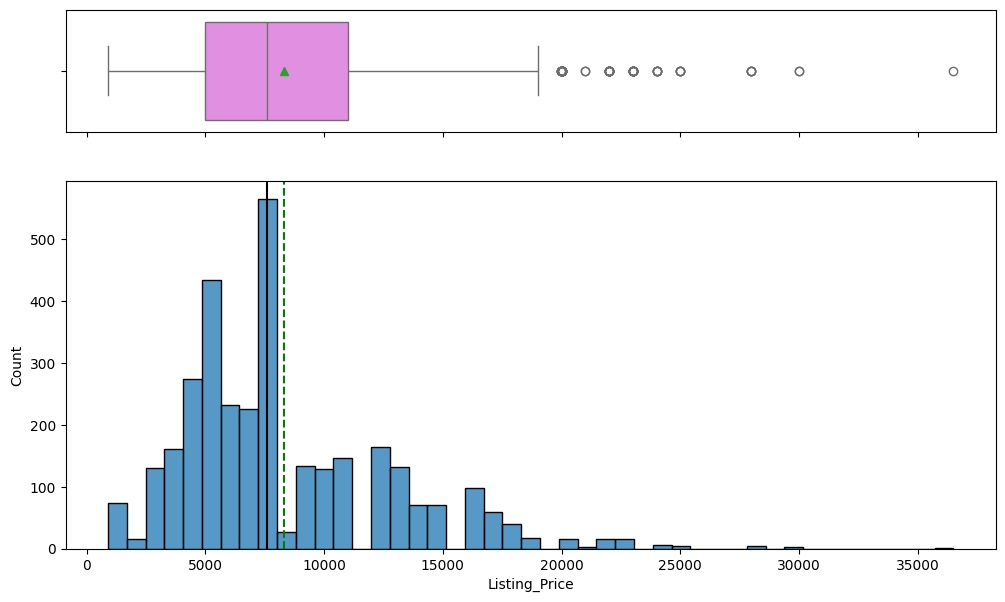

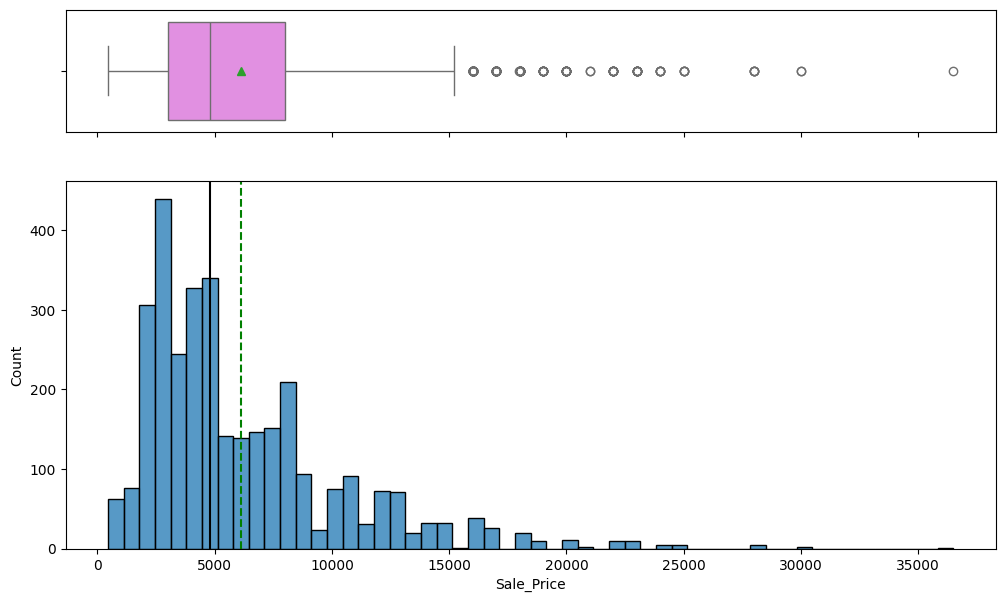

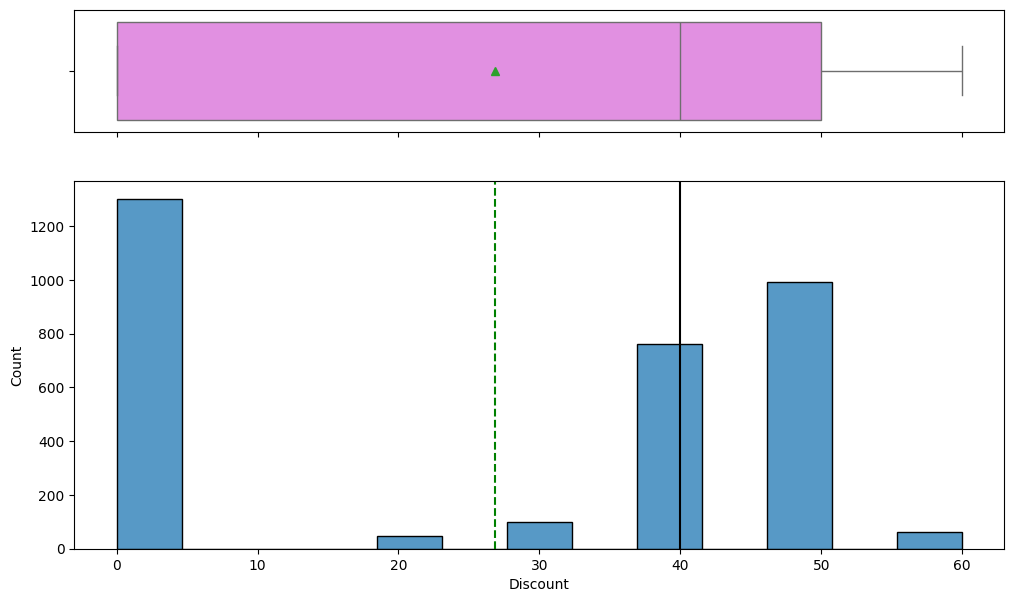

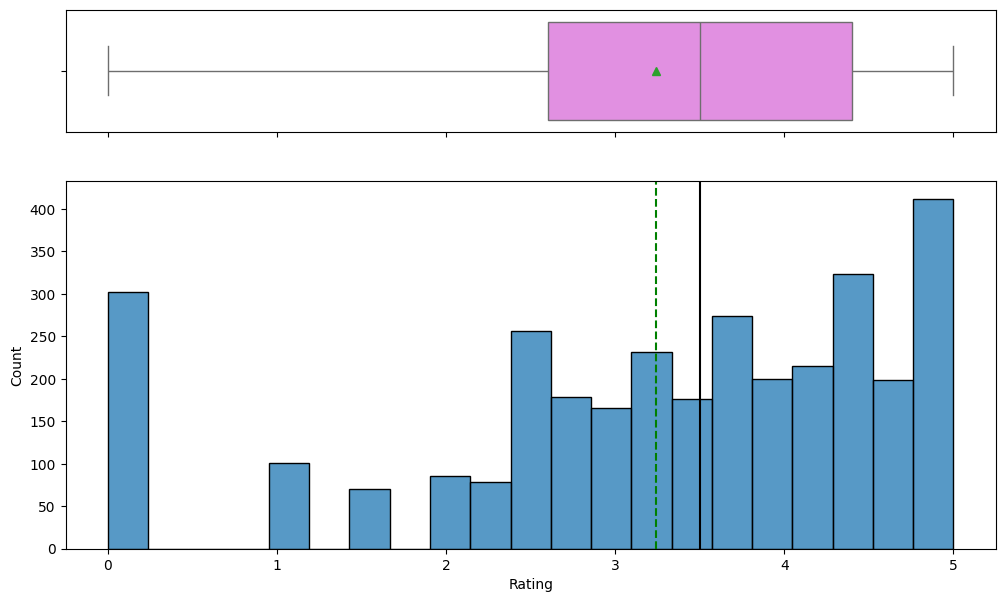

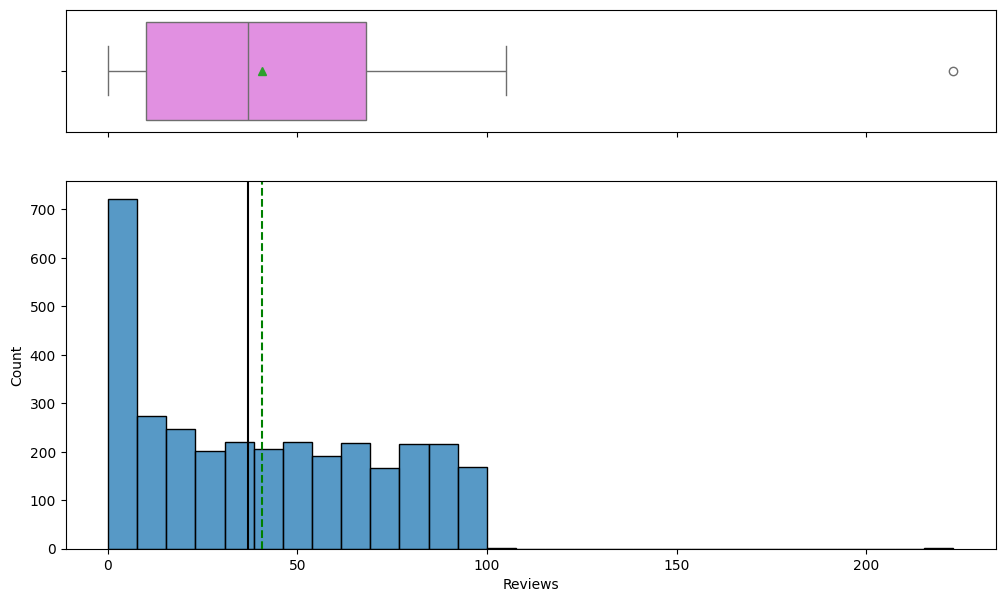

In [19]:
#selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)


In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

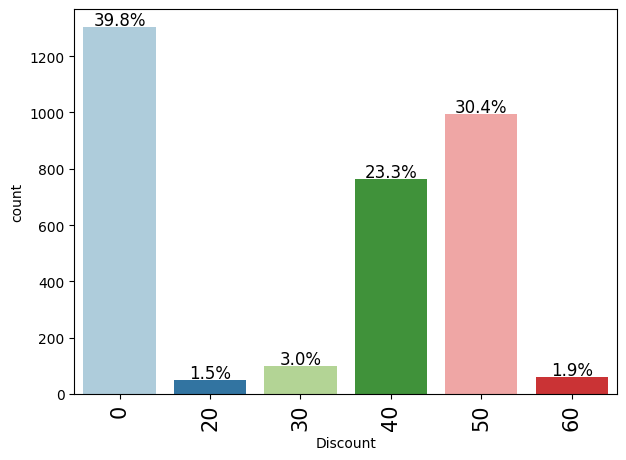

In [21]:
# let's explore discounts further
labeled_barplot(df, "Discount", perc=True)

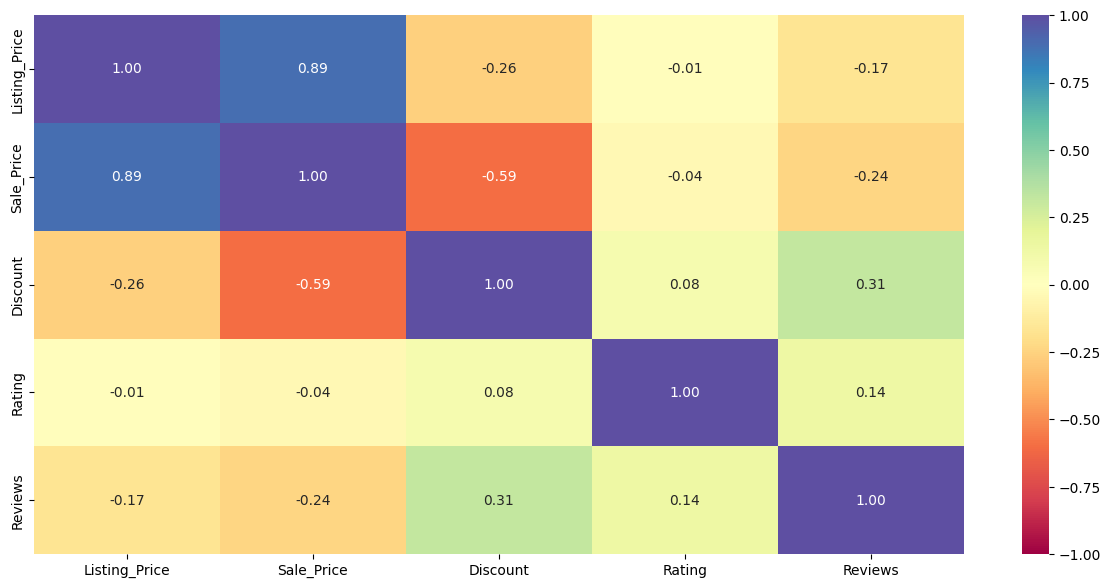

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


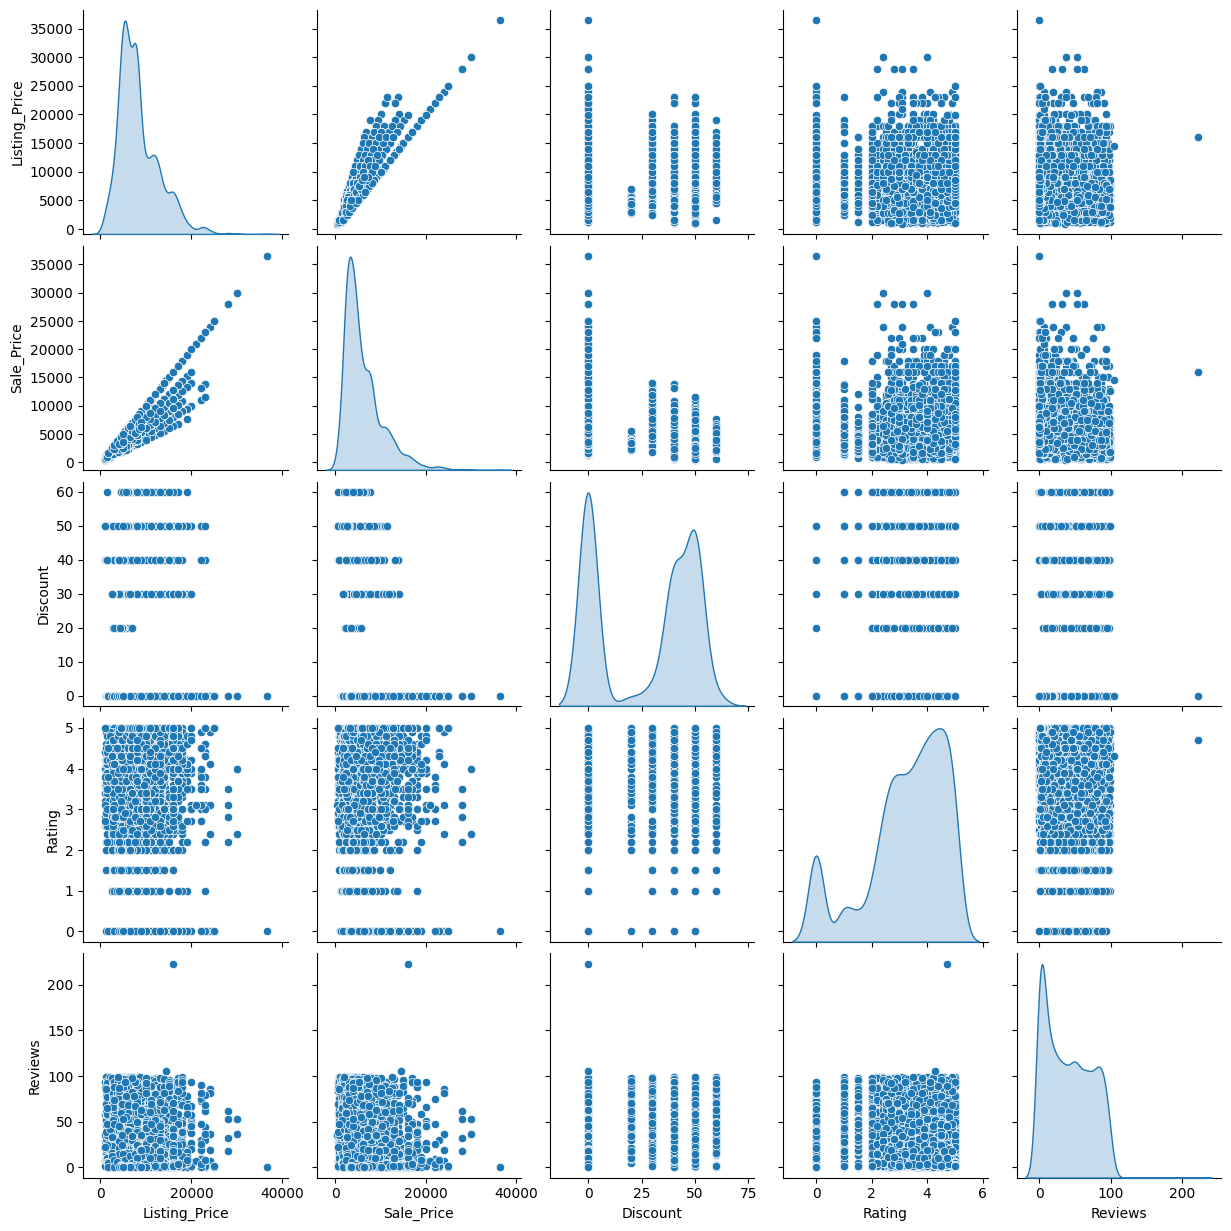

In [23]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

In [24]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [25]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)


In [26]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=1)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

In [27]:
tsne_2d_data.head()


Feature 1  Feature 2
0   2.357984  48.329521
1  -6.472713 -29.004168
2 -22.756767 -18.747328
3  -8.247690 -32.197929
4 -24.121027  27.047672

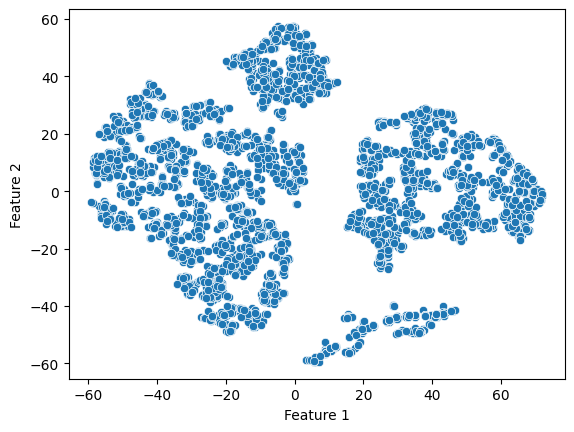

In [28]:
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");


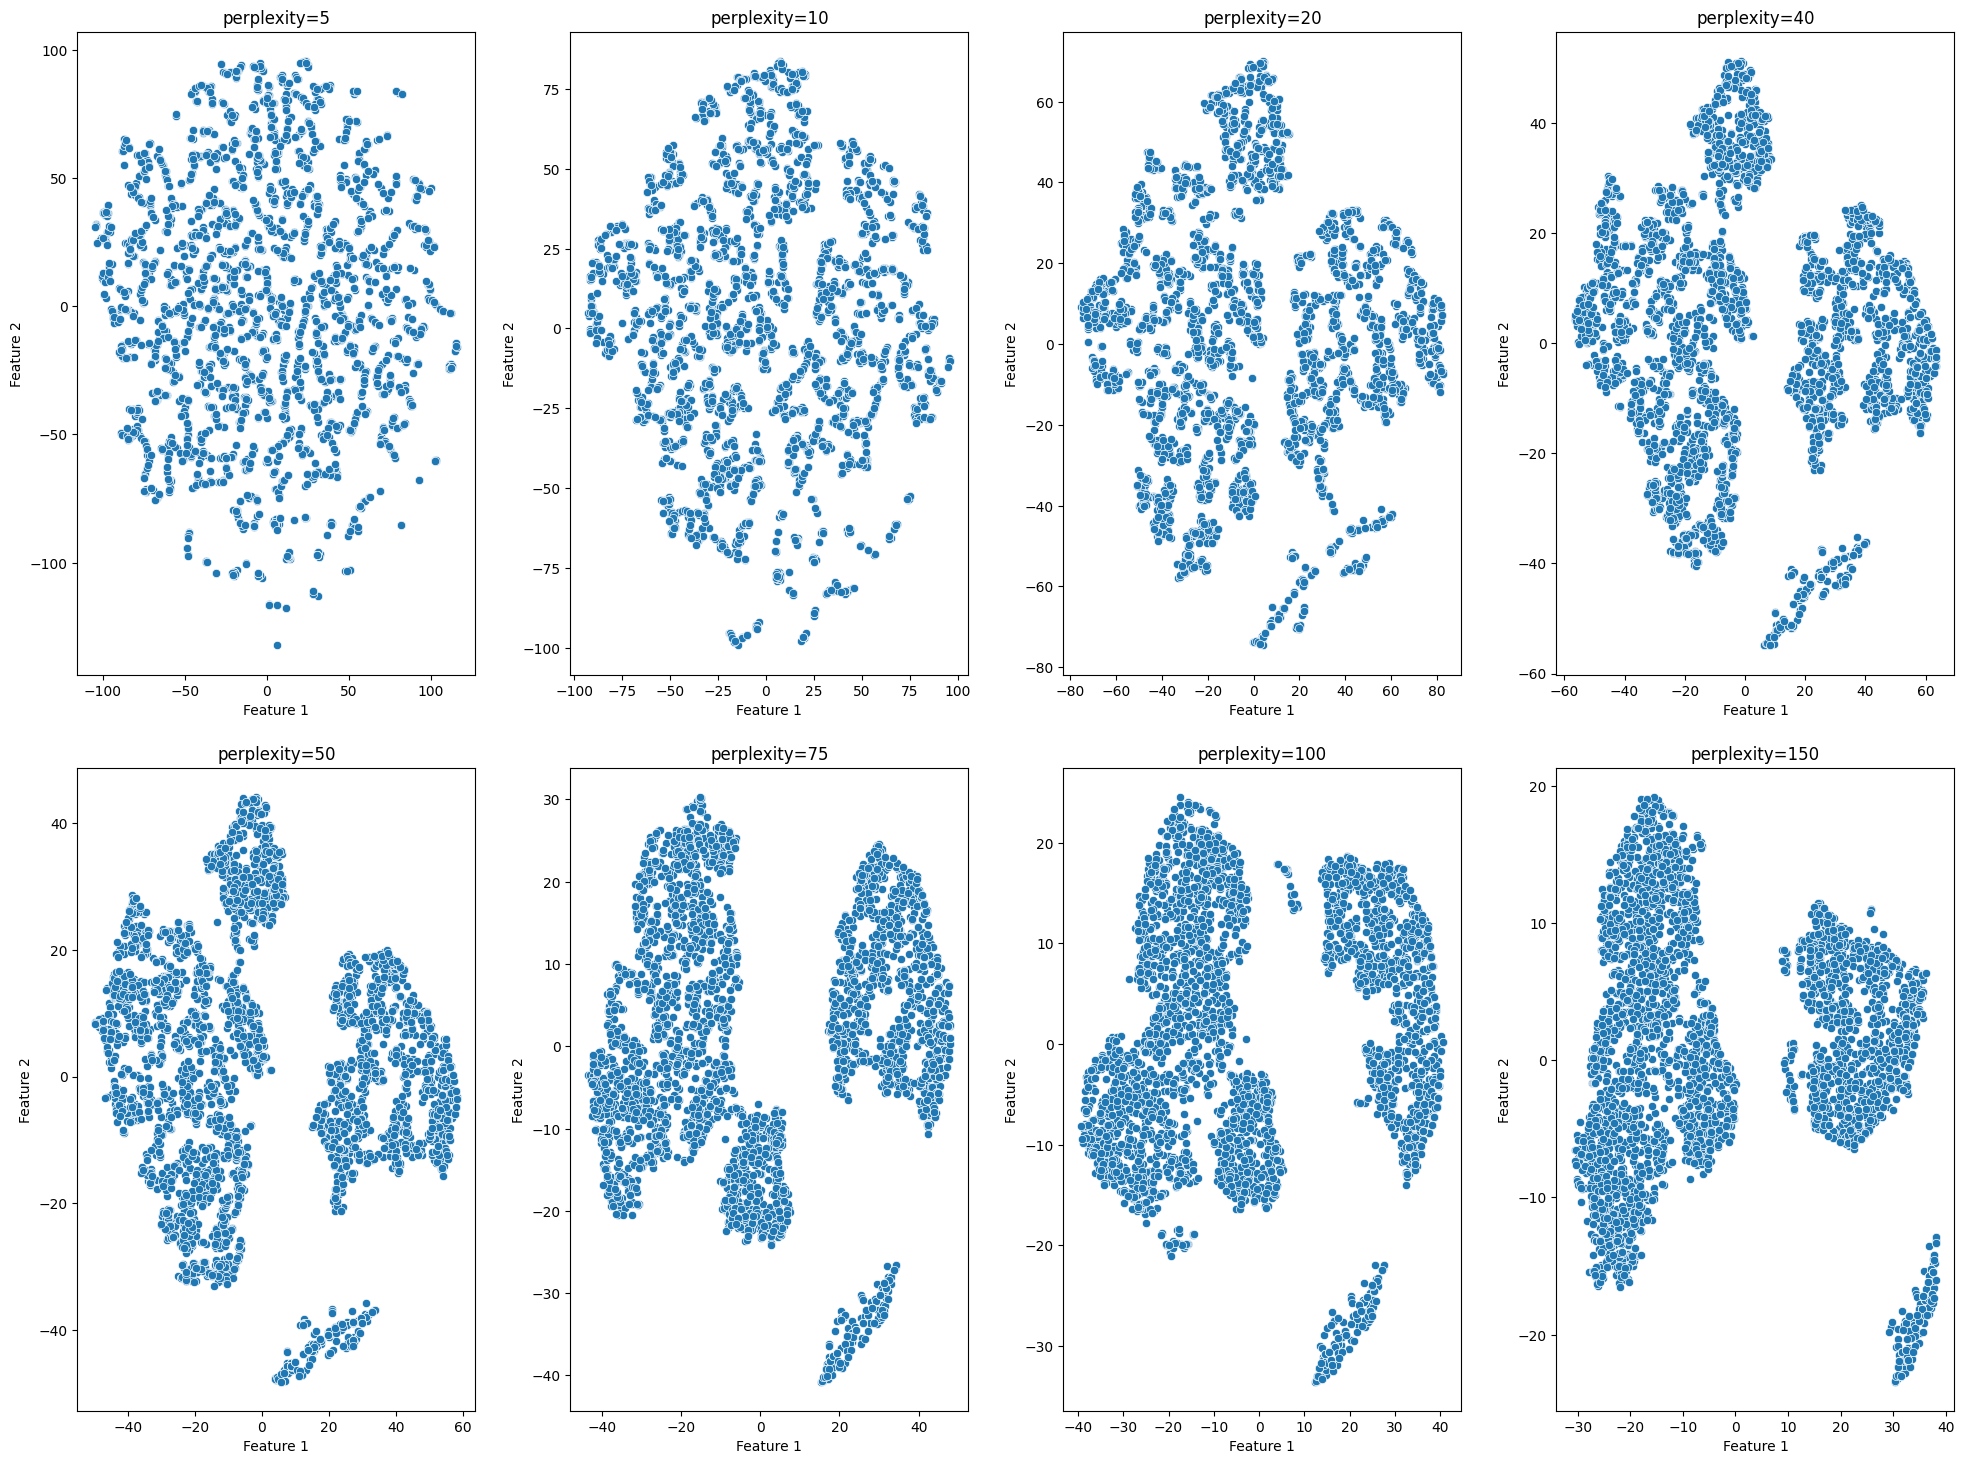

In [29]:
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50, 75, 100, 150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=1)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(subset_scaled_df)   # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

In [30]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-2, random_state=1)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

Feature 1  Feature 2
0   0.339871  37.157509
1  -9.879496 -19.486067
2 -23.266994 -11.366858
3 -12.556101 -21.797041
4 -19.983679  10.045685

In [31]:
# Initiating the TSNE object and setting output dimension to 3
# n_components=3 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, perplexity=50, n_jobs=-2, random_state=1)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions

In [32]:
tsne_3d_data.head()


Feature 1  Feature 2  Feature 3
0   2.589458   1.966576   6.001085
1  -2.333805  -1.596469   1.380598
2 -11.962676  -3.876761  -2.012558
3  -1.413213   0.421479   0.396255
4  -3.903872   4.178730   4.343170

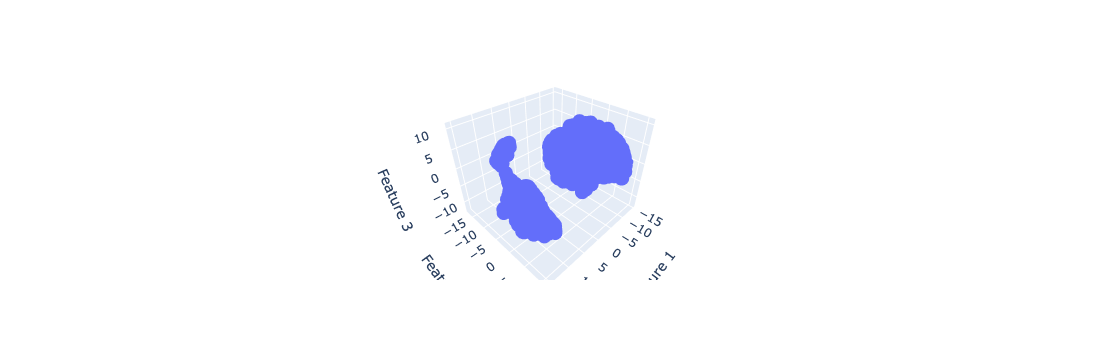

In [33]:
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

In [34]:
k_means_df = subset_scaled_df.copy()


In [35]:
clusters = range(2, 11)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

Number of Clusters: 2 	wcss: 11038.952331560264
Number of Clusters: 3 	wcss: 9050.296090142529
Number of Clusters: 4 	wcss: 7631.678069685331
Number of Clusters: 5 	wcss: 6484.41062234222
Number of Clusters: 6 	wcss: 5765.867498901535
Number of Clusters: 7 	wcss: 5124.376427654249
Number of Clusters: 8 	wcss: 4634.314823000236
Number of Clusters: 9 	wcss: 4234.426625031648
Number of Clusters: 10 	wcss: 3973.569688726134


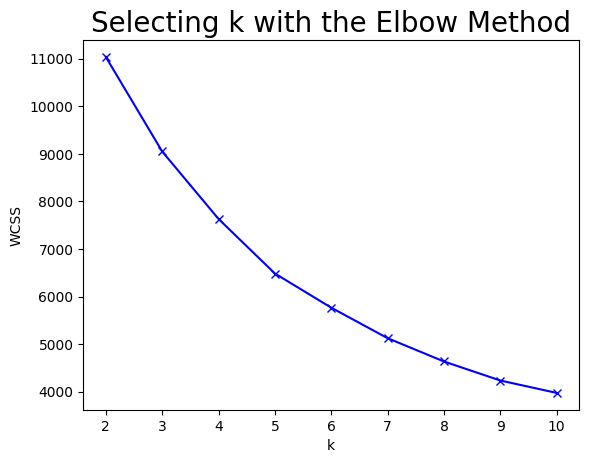

In [36]:
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [37]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.33527087549599244)
For n_clusters = 3, the silhouette score is 0.30279784414152466)
For n_clusters = 4, the silhouette score is 0.3150916222833231)
For n_clusters = 5, the silhouette score is 0.2772510011093968)
For n_clusters = 6, the silhouette score is 0.2879664635004003)
For n_clusters = 7, the silhouette score is 0.2995806303855399)
For n_clusters = 8, the silhouette score is 0.29959842511905765)
For n_clusters = 9, the silhouette score is 0.29605775063567946)


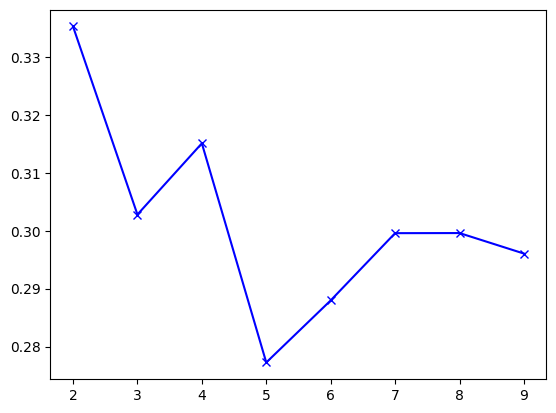

In [38]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

In [39]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [40]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_    # scaled
df1["K_means_segments"] = kmeans.labels_    # original
tsne_2d_data["K_means_segments"] = kmeans.labels_    # t-SNE 2D
tsne_3d_data["K_means_segments"] = kmeans.labels_    # t-SNE 3D

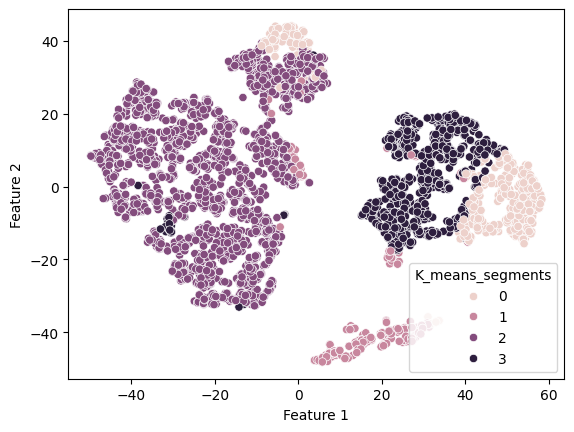

In [41]:
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');


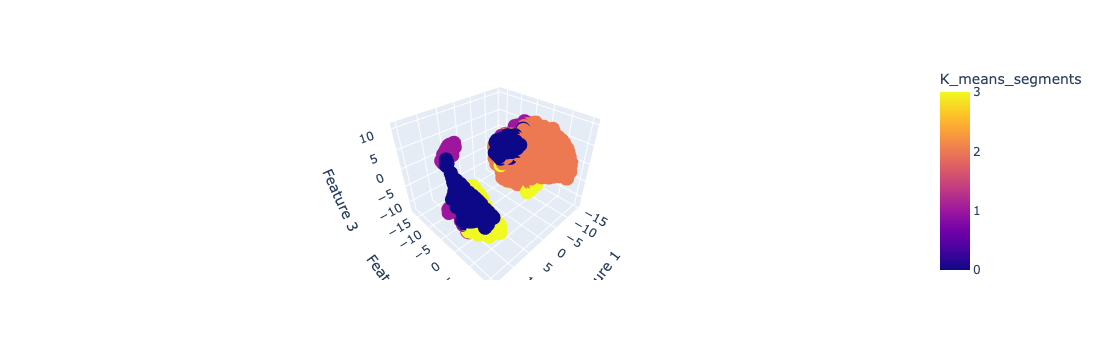

In [42]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color='K_means_segments')
fig.show()

In [43]:
cluster_profile = df1.select_dtypes(include=['number']).groupby("K_means_segments").mean()


In [44]:
cluster_profile["count_in_each_segments"] = (
    df1.select_dtypes(include=['number']).groupby("K_means_segments")["Sale_Price"].count().values
)

In [45]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)


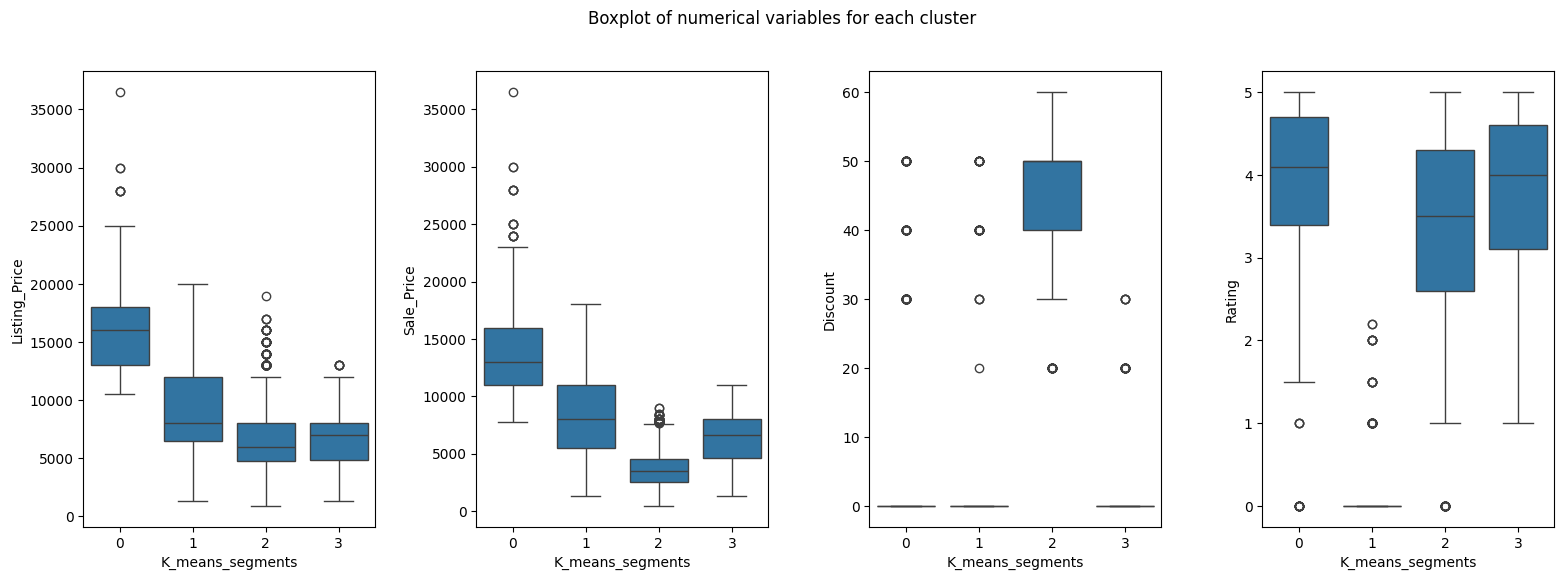

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for i in range(4):
    sns.boxplot(ax=axes[i], y=df1[num_col[counter]], x=df1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [47]:
pd.crosstab(df1.K_means_segments, df.Brand).style.highlight_max(
    color="lightgreen", axis=0
)